In [1]:
import matplotlib.pyplot as plt
import math
from qutip import *
from device import ChalmersQubits
from qutip_qip.circuit import QubitCircuit, Gate
from qutip_qip.operations import rz, rx, ry
from qutip_qip.compiler import Scheduler, Instruction
from device.operations import *
import numpy as np
%load_ext autoreload
%autoreload 2

# Test Single Qubit Gates

In [47]:
# Define a circuit and run the simulation
num_qubits = 2
circuit = QubitCircuit(num_qubits)

# Create the Hadamard Gate
circuit.add_gate("RY", targets=0, arg_value=np.pi/2)
circuit.add_gate("RY", targets=1, arg_value=np.pi/2)
#circuit.add_gate("RX", targets=0, arg_value=np.pi)
circuit.add_gate("GLOBALPHASE", targets=0, arg_value=np.pi/2)

In [48]:
t1 = 1 * 10**3 # nano seconds
t2 = 1.5 * 10**3 # nano seconds
myprocessor = ChalmersQubits(num_qubits, t1=t1, t2=t2)
tlist, coeffs = myprocessor.load_circuit(circuit)

0.006283185307179587


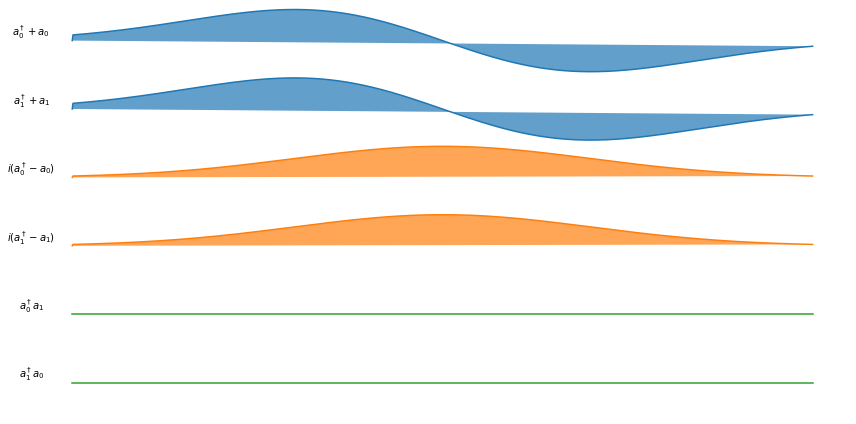

In [49]:
myprocessor.plot_pulses();

### Quantum State Simulation

In [40]:
#initial_state = (basis(3,0)+basis(3,1)).unit()
initial_state = basis(3,0)
result = myprocessor.run_state(initial_state)
final_state = result.states[-1]
final_state

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 5.13229489e-01+2.41507212e-19j  4.93764094e-01+1.15922722e-02j
  -8.60217822e-05-5.10687078e-04j]
 [ 4.93764094e-01-1.15922722e-02j  4.86769426e-01-2.44203087e-19j
  -9.66235165e-05-5.01172219e-04j]
 [-8.60217822e-05+5.10687078e-04j -9.66235165e-05+5.01172219e-04j
   1.08523385e-06+2.69587449e-21j]]

In [41]:
# Project final state to the qubit subspace
qubit_state = project_on_qubit(final_state)
qubit_initial_state = project_on_qubit(initial_state)

In [42]:
# Get the ideal target state
U = circuit.compute_unitary()
target_state = U * qubit_initial_state

In [43]:
print('Fidelity',fidelity(target_state,qubit_state))

Fidelity 0.996876898584468


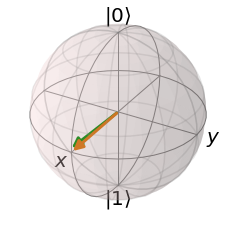

In [44]:
b = Bloch(figsize=(3,3))
b.add_states(qubit_state)
b.add_states(target_state)
#b.add_states(qubit_initial_state)
b.show()

### Compute the propagator

In [56]:
prop = myprocessor.run_propagator()
M = project_on_qubit(prop[-1])

Compute unitary

In [49]:
U = circuit.compute_unitary()

Compute the average gate fidelity

In [19]:
average_gate_fidelity(U,M)

0.9997903863215839

### Compute the average gate fidelity through twirling

In [58]:
# Define a circuit and run the simulation
num_qubits = 1
circuit = QubitCircuit(num_qubits)
circuit.add_gate("RX", targets=0, arg_value=np.pi/2)
# Compute unitary
U = circuit.compute_unitary()

# Test Two Qubit Gates

In [45]:
# Define a circuit and run the simulation
num_qubits = 2

circuit = QubitCircuit(num_qubits)
circuit.add_gate("CZ", controls=0, targets=1)

myprocessor = ChalmersQubits(num_qubits) 
tlist, coeffs = myprocessor.load_circuit(circuit)

0.006283185307179587


/Users/turbotanten/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/turbotanten/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/turbotanten/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/turbotanten/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


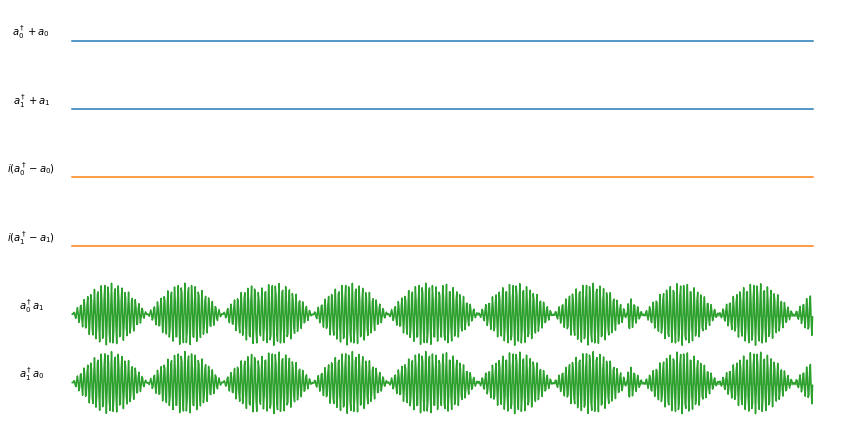

In [46]:
myprocessor.plot_pulses();

In [16]:
prop = myprocessor.run_propagator()
M = project_on_qubit(prop[-1])

### Compute propagator

In [22]:
U = circuit.compute_unitary()
U

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]

In [26]:
average_gate_fidelity(U,M)

0.9996860243010399

### Quantum state simulation

In [22]:
# Define a circuit and run the simulation
num_qubits = 2

circuit = QubitCircuit(num_qubits)
circuit.add_gate("CZ", controls=0, targets=1)

myprocessor = ChalmersQubits(num_qubits) 
tlist, coeffs = myprocessor.load_circuit(circuit)

In [29]:
options = Options(store_states=True)
initial_state = tensor(basis(3,1),basis(3,1))
ket20 = tensor(basis(3,2),basis(3,0))
e_ops = [ket2dm(initial_state),ket2dm(ket20)]
result = myprocessor.run_state(initial_state, e_ops=e_ops, options=options)

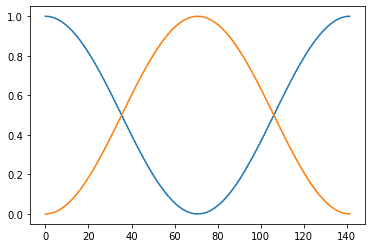

In [30]:
plt.plot(result.times,result.expect[0])
plt.plot(result.times,result.expect[1])

## Test XY-gate

In [556]:
# Define a circuit and run the simulation
num_qubits = 2

circuit = QubitCircuit(num_qubits)
circuit.add_gate("XY", controls=0, targets=1)

myprocessor = ChalmersQubits(num_qubits) 
tlist, coeffs = myprocessor.load_circuit(circuit)

In [88]:
# Compute the propagator
prop = myprocessor.run_propagator(qc=circuit)

In [89]:
# Project it onto the qubit subspace.
project_on_qubit(prop[-1])

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 1.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  7.07109401e-01-6.62946815e-03j
   7.07073083e-01+2.27627006e-07j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j -7.07073083e-01+2.27627006e-07j
   7.07109401e-01+6.62946815e-03j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  9.47320883e-05+0.00000000e+00j]]

In [99]:
initial_state = tensor(basis(3,1),basis(3,0))
target_state = tensor(basis(3,1),basis(3,0))
result = myprocessor.run_state(initial_state, e_ops=[ket2dm(initial_state),ket2dm(target_state)], options=Options(store_states=True))
final_state = result.states[-1]

In [100]:
# All states for N levels in base N
base_N = [np.base_repr(i, base=3) for i in range(3**num_qubits)]
# All computational basis states
base_2 = [np.base_repr(i, base=2) for i in range(2**num_qubits)]
# Indices of of computational basis states in base N list
l = [base_N.index(i) for i in base_2]
# Project state onto quit subspace
qubit_state = Qobj([final_state.full()[i] for i in l], dims=[[2]*num_qubits,[1]*num_qubits])
initial_qubit_state = Qobj([initial_state.full()[i] for i in l], dims=[[2]*num_qubits,[1]*num_qubits])
qubit_state

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.        +0.j        ]
 [0.70704673-0.00034289j]
 [0.70713811+0.00636379j]
 [0.        +0.j        ]]

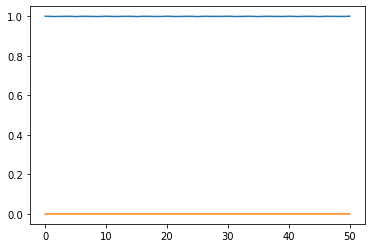

In [95]:
plt.plot(result.times,result.expect[0])
plt.plot(result.times,result.expect[1])

## Test Three Qubit-Gates

In [29]:
# Ideal gate
def cczs(args):
    theta, phi, gamma = args
    U = np.array([[1, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0],
                  [0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 0, 0, -np.exp(-1j*gamma)*np.sin(theta/2)**2 + np.cos(theta/2)**2, 
                                    (1/2)*(1 + np.exp(-1j*gamma))*np.exp(-1j*phi)*np.sin(theta), 0],
                  [0, 0, 0, 0, 0, (1/2)*(1 + np.exp(-1j*gamma))*np.exp(1j*phi)*np.sin(theta), 
                                    -np.exp(-1j*gamma)*np.cos(theta/2)**2 + np.sin(theta/2)**2, 0],
                  [0, 0, 0, 0, 0, 0, 0, -np.exp(1j*gamma)]], dtype="complex")
    return Qobj(U, dims=[[2]*3, [2]*3])

In [30]:
# Define a circuit and run the simulation
num_qubits = 3

circuit = QubitCircuit(num_qubits)
circuit.user_gates = {"CCZS": cczs}

# iFredkin-gate
circuit.add_gate("CCZS", targets=[0,1,2], arg_value=[np.pi/2,np.pi/2,0])
circuit.add_gate("CZ", controls=0, targets=2)

In [31]:
myprocessor = ChalmersQubits(num_qubits)
tlist, coeffs = myprocessor.load_circuit(circuit)

In [32]:
prop = myprocessor.run_propagator()
M = project_on_qubit(prop[-1])

In [33]:
U = circuit.compute_unitary()
U

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

In [37]:
average_gate_fidelity(M,U)

0.9990588627048685

# Test 

In [263]:
def vd_real_circuit():
    num_qubits = 3
    circuit = QubitCircuit(num_qubits)
    circuit.user_gates = {"CCZS": cczs}

    # Hadamard Gate
    circuit.add_gate("RY", targets=0, arg_value=np.pi/2)
    circuit.add_gate("RX", targets=0, arg_value=np.pi)
    circuit.add_gate("GLOBALPHASE", targets=0, arg_value=np.pi/2)

    # iFredkin-gate
    circuit.add_gate("CCZS", targets=[0, 1, 2], arg_value=[np.pi/2, np.pi/2, 0])
    circuit.add_gate("CZ", controls=0, targets=2)

    # Hadamard Gate
    circuit.add_gate("RY", targets=0, arg_value=np.pi/2)
    circuit.add_gate("RX", targets=0, arg_value=np.pi)
    circuit.add_gate("GLOBALPHASE", targets=0, arg_value=np.pi/2)

    return circuit

def vd_imag_circuit():
    num_qubits = 3
    circuit = QubitCircuit(num_qubits)
    circuit.user_gates = {"CCZS": cczs}

    # Prepare |-i> as initial state
    circuit.add_gate("RX", targets=0, arg_value=np.pi/2)

    # iFredkin-gate
    circuit.add_gate("CCZS", targets=[0, 1, 2],
                     arg_value=[np.pi/2, np.pi/2, 0])
    circuit.add_gate("CZ", controls=0, targets=2)

    # Hadamard Gate
    circuit.add_gate("RY", targets=0, arg_value=np.pi/2)
    circuit.add_gate("RX", targets=0, arg_value=np.pi)
    circuit.add_gate("GLOBALPHASE", targets=0, arg_value=np.pi/2)
    return circuit

In [264]:
a = np.zeros((3,3),dtype="complex")
a[:2,:2] = rand_dm(2)
rho = Qobj(a)
(rho**2).tr()

0.6134948765925925

In [118]:
project_on_qubit(res.states[-1]).ptrace(0)*sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 0.51777741+0.j          0.00625792-0.26592099j]
 [-0.00625792-0.26592099j -0.48208314+0.j        ]]

In [266]:
num_qubits = 3
initial_state = tensor(ket2dm(basis(3,0)),rho,rho)
myprocessor = ChalmersQubits(num_qubits)
res = myprocessor.run_state(initial_state, qc=vd_real_circuit())

U = vd_real_circuit().compute_unitary()
target_state = U * project_on_qubit(initial_state) * U.dag()

re_ideal = (sigmaz()*target_state.ptrace(0))
re = (sigmaz()*project_on_qubit(res.states[-1]).ptrace(0))

In [267]:
#rho = rand_dm(3)
initial_state = tensor(ket2dm(basis(3,0)),rho,rho)
myprocessor = ChalmersQubits(num_qubits)
res = myprocessor.run_state(initial_state, qc=vd_imag_circuit())

U = vd_imag_circuit().compute_unitary()
target_state = U * project_on_qubit(initial_state) * U.dag()

im_ideal = (sigmaz()*target_state.ptrace(0))
im = (sigmaz()*project_on_qubit(res.states[-1]).ptrace(0))

In [272]:
print((re_ideal+im_ideal).tr())
print((re+im).tr())
print((rho**2).tr())

0.6134948765925925
0.5722588803194996
0.6134948765925925
